**Extra Content for SANS SEC595: Applied Data Science and AI/Machine Learning for Cybersecurity Professionals**
- https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/

### Transformers for Text Classification
Notebook: SANS SEC595 - Extra Content- Transformers for Text Classification.ipynb

Author: Nik Alleyne  
Author Blog: https://www.securitynik.com  
Author GitHub: github.com/securitynik  

Author Books: [

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
        ] 
 

In lab **5.03 Applying CNNs to Text Classifications.ipynb**, you learned about using Convolution Neural Networks (CNNs) to classify text. Today, one of the architectures use tremendously for Natural Language Processing (NLP) related tasks such as text classification, is the Transformer.

Originally introduced in 2017 via the paper **Attention is All you Need** by Vaswani, et al, and other members of the Google Brain team, this architecture is now the rage. Some may even say it is now the defacto architecture for NLP Natural Language Processing (NLP) tasks. Link to original paper: https://arxiv.org/pdf/1706.03762v5.pdf 

While originally designed for Neural Machine Translation, it has now evolved to an architecture not only for translation but for text classification, computer vision, etc. 

While the original Transformer has an Encoder and Decoder, we will focus on using the Encoder (left side) component to do text classification. 

There are many applications today that use either the Encoder. Think Bidirectional Encoder Representation From Transformers (BERT). Link: https://arxiv.org/pdf/1810.04805.pdf.

There is also ChatGPT which is a Decoder only Transformer and obviously machine translation models that uses both and encoder and decoder.

![Transformer Architecture](./Transformer-Architecture_no_decoder.png)   
*Credit: Original Document*  

We are not attempting to build the entire encoder, but instead lay the foundational understanding of what the Transformer encoder is doing, from the attention, multi-head attention and overall encoder perspective. This is being done so when we transition to using Tensorflow's implementation of the multi-head attention, we have a solid understanding of what is going on in the background.

Each encoder layer has two sub-layers. 
    - A multi-head self attention mechanism
    - A position wise feed-forward neural network

The encoder also leverages a residual connection and layer normalization. 
    - Basically, the input to one layer and the same layer's output are added together and normalized before being passed to the next sub-layer.

In the paper, the sub-layers as well as the embedding dimension, produces outputs of dimension d_model=512. In this notebook, we will keep it with a dimension of 9 for the initial understanding. Keeping it simple!  

Before going any further, let's ty to build out some of these items above in the encoder.

The first item we see from the bottom of the architecture is the inputs. The first input states **Input Embedding**

In [1]:
# Let's create our input text
input_text = 'SANS SEC 595 is Awesome'
input_text

'SANS SEC 595 is Awesome'

In [2]:
# We know once we have our text, we need to get it into tokens
# Let's lowercase the text and split 
input_text = input_text.lower().split()
input_text

['sans', 'sec', '595', 'is', 'awesome']

In [3]:
# We also know that we cannot feed the text directly to the model
# Let's get these to numbers, using list comprehension that you learned about on Day 1
# Note, I start the indexing from 1, because 0 is typically used for padding sequences to ensure they are all the same length
strtoi = { index:word for index,word in enumerate(input_text, start=1)}
strtoi

{1: 'sans', 2: 'sec', 3: '595', 4: 'is', 5: 'awesome'}

In [4]:
# Import the numpy library
import numpy as np

In [5]:
# With this, let's now use the dictionary keys as our number representation of the words
word_vec = np.array(list(strtoi.keys()), dtype=int)
word_vec

array([1, 2, 3, 4, 5])

In [6]:
# Also capture the sequence length
seq_len = len(word_vec)

# Set the embedding dimension of our model
d_model = 9

seq_len, d_model

(5, 9)

In [7]:
# With our words now represented by numbers, let's create some embeddings for them
# The embeddings are generated randomly by default and are learned during the training process
# Our embedding dimension will be 9 for this demo. This is just to help us understand what is going on
# We will say these embeddings represent our word vector
input_embedding = np.random.rand(seq_len, d_model).round(2)
input_embedding, input_embedding.shape

(array([[0.54, 0.73, 0.94, 0.52, 0.3 , 0.08, 0.98, 0.69, 0.07],
        [0.25, 0.43, 0.93, 0.29, 0.86, 0.99, 0.84, 0.5 , 0.25],
        [0.84, 0.43, 0.61, 0.32, 0.05, 0.76, 0.38, 0.85, 0.38],
        [0.56, 0.25, 0.52, 0.66, 0.41, 0.4 , 0.67, 0.65, 0.54],
        [0.02, 0.07, 0.82, 0.04, 0.74, 0.44, 0.69, 0.65, 0.53]]),
 (5, 9))

Now that we have our input embeddings, the next step is for us to get our positional embedding or positional encoding.  
Transformers by default have no concept of word order. In NLP problems word meaning and order matters in many cases. As a result positional encoding or positional embedding is used to maintain the word order.

While the authors use positional encoding in the original paper, we can and will instead use learned positional embeddings. This is also an option in the paper. 

Our positional embeddings have to be the same shape as our input token embeddings

In [8]:
# This is how we would generate the numbers for out positional embeddings
position_embedding = np.random.randn(seq_len, d_model).round(2)
position_embedding, position_embedding.shape

(array([[-2.3 , -0.1 ,  0.91,  0.88,  0.75,  0.57, -0.25, -1.9 ,  0.75],
        [ 1.08, -0.6 ,  0.84,  0.79,  0.93,  0.17, -0.94, -0.49, -0.1 ],
        [-0.12,  0.06, -2.32, -1.54, -1.17, -1.66,  0.8 ,  0.83, -0.47],
        [ 1.7 , -0.43, -0.49, -0.91,  2.17,  0.34,  0.77,  0.68, -1.82],
        [-1.99,  0.09,  0.66, -1.79,  0.36,  0.67, -0.1 ,  0.36,  0.47]]),
 (5, 9))

In [9]:
# Now that we have the input embeddings and the position embeddings, we add them together
encoder_input = input_embedding + position_embedding
encoder_input, encoder_input.shape

(array([[-1.76,  0.63,  1.85,  1.4 ,  1.05,  0.65,  0.73, -1.21,  0.82],
        [ 1.33, -0.17,  1.77,  1.08,  1.79,  1.16, -0.1 ,  0.01,  0.15],
        [ 0.72,  0.49, -1.71, -1.22, -1.12, -0.9 ,  1.18,  1.68, -0.09],
        [ 2.26, -0.18,  0.03, -0.25,  2.58,  0.74,  1.44,  1.33, -1.28],
        [-1.97,  0.16,  1.48, -1.75,  1.1 ,  1.11,  0.59,  1.01,  1.  ]]),
 (5, 9))

**Attention** mechanism **single head** 
With the understanding of how we get our initial input, let's now focus on the attention mechanism from a single head perspective.  

The attention mechanism leverages a set of query, key and value vectors. The outputs from these three are computed as a weighted sum of the values. The attention mechanism uses the **scaled dot-product attention**
    - We compute the dot product of the query and keys transposed. 
    - This value is then scaled by the square of d_k
    - A softmax activation function is then applied to this output
    - Finally the output from the softmax is multiplied by the value vector

![Attention Formula](./attention-formula.png)

With the formula understood, here is another view of the scaled dot-product attention  
![](./scaled_dot_product_attention.png)  

Notice the *Mask* is optional. We will not implement the mask. The mask is used in the decoder component as part of the *Masked Multi-Head Attention*. As we are not focused on the decoder, we will ignore this during our implementation.

The scaled dot-product attention requires input of queries, keys and values. Where are these inputs coming from? 
    - First we generate the W_q (query), W_k (key) and W_v (value) matrices
        - These are called our projection matrices
    - For this learning, we will use the same shape (d_model, d_model). 
        - The input embeddings currently have shape (seq_len, d_model) -> (5, 9)

In [10]:
# Create the projection matrices with shape (d_model, d_model)
W_q = np.random.randn(d_model, d_model).round(2)
W_k = np.random.randn(d_model, d_model).round(2)
W_v = np.random.randn(d_model, d_model).round(2)

print(f' Shape of query projection matrices: {W_q.shape}')
print(f' Shape of key projection matrices: {W_k.shape}')
print(f' Shape of value projection matrices: {W_v.shape}')

 Shape of query projection matrices: (9, 9)
 Shape of key projection matrices: (9, 9)
 Shape of value projection matrices: (9, 9)


In [11]:
# With the projection matrices in places, let's multiply each of these by our encoder_input
Q = encoder_input.dot(b=W_q)
K = encoder_input.dot(b=W_k)
V = encoder_input.dot(b=W_v)

# d_k becomes the number of dimensions
d_k = K.shape[-1]

print(f' Shape of Q matrix: {Q.shape}')
print(f' Shape of K matrix: {K.shape}')
print(f' Shape of V matrix: {V.shape}')
print(f' Dimension of d_k: {d_k}')

print(f' Sneak peak at one of the Q matrix: {Q}')

 Shape of Q matrix: (5, 9)
 Shape of K matrix: (5, 9)
 Shape of V matrix: (5, 9)
 Dimension of d_k: 9
 Sneak peak at one of the Q matrix: [[-2.9822  1.745   0.8189 -0.5951 -5.7872 -4.4018  1.3885 -4.7432  0.4624]
 [ 4.7129  1.9458  0.9297 -2.7064 -8.6209 -2.5747 -0.5317 -6.7066  2.6584]
 [ 0.2364 -2.0355 -0.4508  0.6404  7.7962  5.2163  3.1743  6.3102 -0.0625]
 [ 7.2598  2.0137  0.8772 -4.1268 -4.2767  4.3017  2.0874 -6.1461  5.6124]
 [-1.301  -3.5686 -5.3088  0.7181  1.534  -1.8352  2.0485 -4.6188  4.0588]]


In [12]:
# Because we will need the softmax activation function to compute the weighted scores, let's create our own softmax.
# We could easily use Tensorflow's softmax but let's do this for our learning.
# Besides, you learned about activation functions (including softmax) on day 4

def softmax(x):
    ''' compute the softmax of the input vector '''
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

In [13]:
# Let's create this function for the scaled dot product attention
# Remember, we are focused only on the encoder, hence the reason I am not specifying the mask
def scaled_dot_product_attention(query=Q, key=K, value=V):
    # Setup d_k
    d_k = key.shape[-1]
    
    # Computing the dot product of the query and key transpose
    dot_prod_scores = np.dot(query, key.T)

    # Get the scaled scores
    scaled_dot_product_scores = dot_prod_scores/np.sqrt(d_k)

    # Compute the attention weights
    weighted_scores = softmax(scaled_dot_product_scores)

    # Finally, perform the dot product of these scores against the values
    weighted_sum = np.dot(a=weighted_scores, b=value)

    print(f'Attention output shape: {weighted_sum.shape}')

    return weighted_sum

In [14]:
# Run the function ag
attention_output = scaled_dot_product_attention()
attention_output, attention_output.shape

Attention output shape: (5, 9)


(array([[-2.29537869, -2.1052916 ,  2.5829472 , -5.81641078,  0.14515746,
         -6.27636132, -2.24629101, -3.89586988, -3.41831815],
        [-2.30387876, -2.11424865,  2.5848723 , -5.83349374,  0.14503061,
         -6.27671896, -2.24152521, -3.90500929, -3.42871121],
        [-2.39615697,  2.35138862, -1.90375672, -0.59752882, -2.52735362,
          4.02004166,  3.7198141 , -0.32981099,  0.02126654],
        [-2.1124319 , -1.36694853,  2.20955505, -4.67946942, -0.03756386,
         -5.62813332, -1.62072687, -3.82188411, -3.30120808],
        [-1.45541456, -0.0124403 ,  1.92521443, -2.20514016, -0.05643559,
         -5.56876672, -0.91743314, -4.18638382, -3.53243809]]),
 (5, 9))

We have made good progress so far. We have computed the attention scores.   
As we saw in the Transformer architecture, the output from the attention mechanism, is added to the input to the attention mechanism.   
The added content is then passed though layer normalization before being fed to the feed-forward network.
Let's add the two.

In [15]:
# Adding the input to the self attention with the output of the self attention
enc_in_enc_out_added = encoder_input + attention_output
enc_in_enc_out_added

array([[-4.05537869, -1.4752916 ,  4.4329472 , -4.41641078,  1.19515746,
        -5.62636132, -1.51629101, -5.10586988, -2.59831815],
       [-0.97387876, -2.28424865,  4.3548723 , -4.75349374,  1.93503061,
        -5.11671896, -2.34152521, -3.89500929, -3.27871121],
       [-1.67615697,  2.84138862, -3.61375672, -1.81752882, -3.64735362,
         3.12004166,  4.8998141 ,  1.35018901, -0.06873346],
       [ 0.1475681 , -1.54694853,  2.23955505, -4.92946942,  2.54243614,
        -4.88813332, -0.18072687, -2.49188411, -4.58120808],
       [-3.42541456,  0.1475597 ,  3.40521443, -3.95514016,  1.04356441,
        -4.45876672, -0.32743314, -3.17638382, -2.53243809]])

In [16]:
import tensorflow as tf

In [17]:
# Let's cheat for this by leveraging Tensorflow's LayerNormalization
layer_norm_1_out = tf.keras.layers.LayerNormalization()(enc_in_enc_out_added).numpy()

# Take a peak into the output as well as its shape
layer_norm_1_out, layer_norm_1_out.shape

(array([[-0.6260074 ,  0.21266592,  2.1331754 , -0.7433631 ,  1.0807118 ,
         -1.1366649 ,  0.1993388 , -0.9674759 , -0.15238078],
        [ 0.2839749 , -0.15733601,  2.0786102 , -0.98893696,  1.2636476 ,
         -1.1112652 , -0.17662588, -0.6998136 , -0.4922546 ],
        [-0.6302281 ,  0.9252424 , -1.2973778 , -0.678905  , -1.3089459 ,
          1.0211875 ,  1.6339946 ,  0.4117961 , -0.07676391],
        [ 0.6047765 , -0.00941283,  1.3630317 , -1.2354311 ,  1.472813  ,
         -1.2204486 ,  0.4857837 , -0.35191125, -1.1092013 ],
        [-0.7749023 ,  0.64498794,  1.939571  , -0.98541373,  1.0010577 ,
         -1.1855537 ,  0.4562271 , -0.6759381 , -0.42003587]],
       dtype=float32),
 (5, 9))

Let us now prepare to move this data into the feed-forward network.  
The feed-forward network consists of two linear layers, separated by a Rectified Linear Unit (ReLU) activation function.
In the paper, the output of the first linear layer is 2048 or 4 times the size of the d_model 

Let's create our own ReLU activation function as we will need it.

In [18]:
# Out ReLU function
def ReLU(x):
    ''' Rectified Linear Unit Activation Function '''
    return np.maximum(0, x)

Because the first layer output will be d_model * 4, we will have an output from our first linear layer as (d_model * 4) -> (9 * 4) = 36  
This will then have to come back down to our d_model shape in the final layer.  
While we can use a Dense layer in Tensorflow, let's instead build our own linear layer.  

We know from above the output shape of layer_norm_1_out is (5,9).   
This means our first linear layer should have a shape of 9 * 36. 
    - Remember 36 is  d_model(9) * 4 = 36

In [19]:
# Creating out first linear layer with random weights
W_ff_1 = np.random.randn(d_model, d_model * 4)

# Similarly, we need to get back down to the dimension of the model
# Creating the layer with random weights
W_ff_2 = np.random.randn(d_model * 4, d_model)

# Let us also also set a bias
bias = 1.

W_ff_1.shape, W_ff_2.shape, bias

((9, 36), (36, 9), 1.0)

In [20]:
# Let's now build out the feed-forward network
ff_1_out = layer_norm_1_out.dot(W_ff_1) + bias

# Apply ReLU to ff_1_out
relu_out = ReLU(x=ff_1_out)

# Complete the final linear layer
ff_2_out = relu_out.dot(W_ff_2) + bias

ff_2_out, ff_2_out.shape

(array([[ -5.59817239,  13.40353644,  12.11232998,  -5.52666659,
          20.06776042,   1.12222705,  -3.15175176, -36.09188456,
         -11.36419507],
        [-13.01045807,  15.2184638 ,  15.89086221,  -4.39556262,
          20.88655363,   0.85192078,  -3.74102385, -34.16731205,
          -5.54309981],
        [ -9.31880538,  15.95546713,  -2.57025451,  -0.69132938,
          19.76062006, -12.60312027,   4.61445251,  -8.51298259,
         -10.15996836],
        [-14.6858949 ,  14.61266175,   8.49446998,   0.45655724,
          27.02870345, -10.90333399,   4.94547246, -23.94197405,
           0.09929276],
        [ -4.46828807,  15.11643183,  10.48231661,  -1.99640449,
          20.81671489,   0.19892872,  -1.11283326, -33.33511594,
          -6.46419653]]),
 (5, 9))

We are looking good so far as the output shape of the feed-forward network matches our input.  
All that is needed now for us to complete this single head, is to do like we did before.  
We add the output of the feed-forward network with its input and then pass that through layer normalization.  
Previously we did this as a multi-step process. Let's just do it all in one go now.

In [21]:
# Performing the addition and layer norm
layer_norm_2_out = tf.keras.layers.LayerNormalization()(ff_2_out + layer_norm_1_out)
layer_norm_2_out

<tf.Tensor: shape=(5, 9), dtype=float32, numpy=
array([[-0.27871487,  0.9354182 ,  0.97392845, -0.28152063,  1.3963559 ,
         0.10129058, -0.07849896, -2.1656752 , -0.6025833 ],
       [-0.71136385,  0.95864546,  1.1334343 , -0.2701175 ,  1.3846922 ,
         0.03789951, -0.18196121, -2.0419958 , -0.30923328],
       [-0.87105507,  1.5742245 , -0.31679234, -0.08917791,  1.7174032 ,
        -1.0198785 ,  0.6051935 , -0.7026411 , -0.8972761 ],
       [-0.9696604 ,  0.91481984,  0.60303795, -0.09574127,  1.827896  ,
        -0.84106904,  0.31224638, -1.6406099 , -0.11091959],
       [-0.3360558 ,  1.0323181 ,  0.8147597 , -0.18873562,  1.4268674 ,
        -0.05875605, -0.03725653, -2.2101774 , -0.44296372]],
      dtype=float32)>

That's it, we have completed a single head attention for an encoder block.  
Two things to be aware of:  
    1: On most days you will use a multi-head attention heads.  
        - In the paper, they used 8 heads  
    2. On most days you will have multiple encoder blocks  
        - In the paper, they used 6 identical encoder blocks

Looking back at the paper, we see that their is also reference to a multi-head attention.  

![Multi-Head Attention](./multi-head-attention-resized.png)  

One of the first steps in creating a multi-head attention, is we need to ensure the model dimension is divisible by the number of heads.  
For example our d_model is 9, so we can only have 3 heads if we are looking for multi-head attention 

In [22]:
# How many heads would we like to have?
n_heads = 3

# Confirm the model dimension is divisible by the number of heads
assert d_model % n_heads == 0, f'Oops! Looks like your model dimension is not divisible by the number of heads'

# If it is divisible, set the value for d_k
d_k = d_model // n_heads

d_k

3

In [23]:
# Our input data looks like below and has a shape of
input_embedding, input_embedding.shape

(array([[0.54, 0.73, 0.94, 0.52, 0.3 , 0.08, 0.98, 0.69, 0.07],
        [0.25, 0.43, 0.93, 0.29, 0.86, 0.99, 0.84, 0.5 , 0.25],
        [0.84, 0.43, 0.61, 0.32, 0.05, 0.76, 0.38, 0.85, 0.38],
        [0.56, 0.25, 0.52, 0.66, 0.41, 0.4 , 0.67, 0.65, 0.54],
        [0.02, 0.07, 0.82, 0.04, 0.74, 0.44, 0.69, 0.65, 0.53]]),
 (5, 9))

In [24]:
# To make this a bit more interesting, let's add a batch size via reshaping the input embedding
input_embedding = input_embedding.reshape(-1, seq_len, d_model)

# Notice the new dimension added
input_embedding, input_embedding.shape

(array([[[0.54, 0.73, 0.94, 0.52, 0.3 , 0.08, 0.98, 0.69, 0.07],
         [0.25, 0.43, 0.93, 0.29, 0.86, 0.99, 0.84, 0.5 , 0.25],
         [0.84, 0.43, 0.61, 0.32, 0.05, 0.76, 0.38, 0.85, 0.38],
         [0.56, 0.25, 0.52, 0.66, 0.41, 0.4 , 0.67, 0.65, 0.54],
         [0.02, 0.07, 0.82, 0.04, 0.74, 0.44, 0.69, 0.65, 0.53]]]),
 (1, 5, 9))

In [24]:
# Setup the projection matrices for each of the heads
# Obviously, this is a simplified view. 
# There are more interesting ways, such as building one matrix and split it into n_heads
# Then doing some reshaping and transposing

# Head 0
W_q0 = np.random.rand(d_model, d_k).round(2)
W_k0 = np.random.rand(d_model, d_k).round(2)
W_v0 = np.random.rand(d_model, d_k).round(2)

# Head 1
W_q1 = np.random.rand(d_model, d_k).round(2)
W_k1 = np.random.rand(d_model, d_k).round(2)
W_v1 = np.random.rand(d_model, d_k).round(2)

# Head 2
W_q2 = np.random.rand(d_model, d_k).round(2)
W_k2 = np.random.rand(d_model, d_k).round(2)
W_v2 = np.random.rand(d_model, d_k).round(2)

# Peak into one of the matrices
W_q0, W_q0.shape

(array([[0.24, 0.32, 0.72],
        [0.11, 0.76, 0.4 ],
        [0.52, 0.31, 0.56],
        [0.25, 0.2 , 0.72],
        [0.29, 0.63, 0.64],
        [0.47, 0.81, 0.23],
        [0.83, 0.49, 0.71],
        [0.54, 0.41, 0.37],
        [0.65, 0.61, 0.71]]),
 (9, 3))

In [25]:
# Like we did earlier, the input needs to be multiplied by each of these Q, K and V for each head
# I am squeezing these dimensions so as not to have to go back to modify my scaled_dot_product_attention function

# Starting with head 0
Q_0 = input_embedding.dot(b=W_q0).squeeze()
K_0 = input_embedding.dot(b=W_k0).squeeze()
V_0 = input_embedding.dot(b=W_v0).squeeze()

# Next head 1
Q_1 = input_embedding.dot(b=W_q1).squeeze()
K_1 = input_embedding.dot(b=W_k1).squeeze()
V_1 = input_embedding.dot(b=W_v1).squeeze()

# Finally head 2
Q_2 = input_embedding.dot(b=W_q2).squeeze()
K_2 = input_embedding.dot(b=W_k2).squeeze()
V_2 = input_embedding.dot(b=W_v2).squeeze()

# Peaking into one Q_2
Q_2, Q_2.shape


(array([[2.2186, 2.2533, 3.4379],
        [1.6695, 1.7363, 2.9354],
        [1.7962, 1.8967, 2.4002],
        [2.227 , 2.4521, 3.3524],
        [2.078 , 1.8032, 3.6577]]),
 (5, 3))

In [26]:
# As we did before, let's pass these Q, K and V for each head into our scaled_dot_product_attention function
head_0_out = scaled_dot_product_attention(query=Q_0, key=K_0, value=V_0)
head_1_out = scaled_dot_product_attention(query=Q_1, key=K_1, value=V_1)
head_2_out = scaled_dot_product_attention(query=Q_2, key=K_2, value=V_2)

# Get a sneak peak at head_2_out
head_2_out, head_2_out.shape

Attention output shape: (5, 3)
Attention output shape: (5, 3)
Attention output shape: (5, 3)


(array([[1.83134513, 2.114575  , 1.91262889],
        [1.83201242, 2.09422159, 1.89113538],
        [1.82995942, 2.0907753 , 1.88862579],
        [1.83517201, 2.11220654, 1.90971492],
        [1.82609139, 2.1159395 , 1.91447835]]),
 (5, 3))

At this point, we notice we have 3 sets of 5x3 matrices.  
Our original input_embeddings has a shape of 5*9. However, here we have 3 sets of 5x3.  
How do we get this back to the original dimension size of 5x9? Concatenation!

In [27]:
# Get all the outputs from the various heads and put them to gether to get back our input dimension
multi_head_output = np.concatenate((head_0_out, head_1_out, head_2_out), axis=-1)
multi_head_output, multi_head_output.shape

(array([[3.04740807, 1.78545351, 3.2824175 , 2.21270187, 2.30285556,
         2.44269649, 1.83134513, 2.114575  , 1.91262889],
        [3.01572231, 1.77575387, 3.264228  , 2.21542824, 2.29635698,
         2.43329439, 1.83201242, 2.09422159, 1.89113538],
        [3.01675419, 1.77572809, 3.26450254, 2.21916519, 2.28504049,
         2.42036278, 1.82995942, 2.0907753 , 1.88862579],
        [3.03632911, 1.78196257, 3.27598099, 2.21438901, 2.30331932,
         2.4416257 , 1.83517201, 2.11220654, 1.90971492],
        [3.04179889, 1.78274983, 3.27863639, 2.21540338, 2.2968403 ,
         2.4345755 , 1.82609139, 2.1159395 , 1.91447835]]),
 (5, 9))

In [28]:
# With this in place, we go through the same steps as before
# Let's get the outputs
multi_head_layer_norm_out = tf.keras.layers.LayerNormalization()(multi_head_output + input_embedding).numpy()
multi_head_layer_norm_out, multi_head_layer_norm_out.shape

(array([[[ 1.4759471 , -1.2672417 ,  1.5403178 , -0.64715856,
           0.732115  , -0.0404124 , -0.11644318, -1.3056297 ,
          -0.37149438],
         [ 1.7306117 , -0.767067  ,  1.4362975 , -0.8113624 ,
          -0.25495583,  0.836064  , -0.34894133, -0.65245265,
          -1.1681908 ],
         [ 1.4639122 , -0.40140373,  2.005514  , -0.376112  ,
          -0.816783  , -0.11034926,  0.13357851, -0.9753876 ,
          -0.9229674 ],
         [ 1.987251  , -0.8319242 ,  1.3226466 , -1.2086434 ,
           0.06500284, -0.06695835, -0.31318077,  0.03663429,
          -0.9908274 ],
         [ 1.2799908 , -1.6930561 ,  1.800691  , -0.8505454 ,
           0.41725773,  0.01911202, -0.38925403, -0.35663506,
          -0.22756222]]], dtype=float32),
 (1, 5, 9))

In [29]:
# Like we did before, pass this through the feed-forward network
# I will reuse the same weights from the single head attention
multi_ff_1_out = multi_head_layer_norm_out.dot(W_ff_1)
multi_relu = ReLU(multi_ff_1_out)
multi_ff_2_out = multi_relu.dot(b=W_ff_2)
multi_ff_2_out, multi_ff_2_out.shape

(array([[[ 1.29311764e+01, -1.09924470e+01, -1.90726610e+01,
           1.89646673e+00,  1.43288608e+01,  2.26665703e+01,
          -1.88985953e+01,  1.54776601e+01, -3.96142134e+00],
         [ 3.86250487e+00, -9.84489248e+00, -2.10765411e+01,
           6.00000860e-01,  1.99664811e+01,  2.91309136e+01,
          -2.27175717e+01,  2.89784222e+01, -8.63155542e+00],
         [ 1.40362449e-02, -2.23493037e+01, -1.64722052e+01,
           7.66181874e+00,  1.10929255e+01,  2.55366653e+01,
          -1.05821943e+01,  3.11001412e+01, -1.31931701e+01],
         [ 1.22285001e+01, -9.94086117e+00, -3.25052922e+01,
           6.99657302e+00,  2.28478722e+01,  3.00058788e+01,
          -1.70198386e+01,  1.87363284e+01, -3.55717089e+00],
         [ 1.94002871e+01, -1.26273045e-01, -1.93610222e+01,
           4.38654323e+00,  1.46314555e+01,  1.45504603e+01,
          -1.28268894e+01,  7.24546869e-01,  1.75193100e+00]]]),
 (1, 5, 9))

In [30]:
# Wrap this up with layer normalization
multi_ff_out = tf.keras.layers.LayerNormalization()(multi_ff_2_out + multi_head_layer_norm_out)
multi_ff_out, multi_ff_out.shape

(<tf.Tensor: shape=(1, 5, 9), dtype=float32, numpy=
 array([[[ 0.8671883 , -0.938077  , -1.2950202 , -0.02355736,
           0.9114522 ,  1.4235929 , -1.3953943 ,  0.8512732 ,
          -0.4014576 ],
         [ 0.17716123, -0.682099  , -1.160816  , -0.13061625,
           0.9257777 ,  1.4695642 , -1.342491  ,  1.3825512 ,
          -0.6390321 ],
         [ 0.0031429 , -1.3874924 , -0.91202044,  0.33648676,
           0.5081267 ,  1.3776906 , -0.68139786,  1.6473637 ,
          -0.89189994],
         [ 0.5782381 , -0.7202563 , -1.7808262 ,  0.14029813,
           1.030172  ,  1.3952707 , -1.0611497 ,  0.8150472 ,
          -0.39679396],
         [ 1.5020843 , -0.36406714, -1.6696497 ,  0.08011176,
           1.0349938 ,  0.9952531 , -1.3093362 , -0.18265408,
          -0.0867358 ]]], dtype=float32)>,
 TensorShape([1, 5, 9]))

Ok. That gives us a great start on understanding the transformer encoder.  
Let's now take our learnings and apply it to our text problem from lab **5.03 Applying CNNs to Text Classifications.ipynb**  

In [31]:
import psycopg2

In [32]:
SERVER_ADDRESS="595data.enclaveforensics.com"
db = psycopg2.connect(
    host = SERVER_ADDRESS,
    database = "news",
    user = "sans",
    password = "training"
)

cursor = db.cursor()
cursor.execute(f"""
    SELECT category_name, headline, summary 
        FROM categories, headlines, summaries 
        WHERE categories.category_id=headlines.category_id AND
            headlines.summary_id=summaries.summary_id
""")
results = cursor.fetchall()
cursor.close()

If you were successful, you should now have a result from a SQL cursor object that contains 200,853+ entries.  Just thinking ahead and knowing that we will eventually need to convert the labels into numbers, we could just use the database ID values as the category numbers.  While we could choose to dismiss this idea as something to "do later," let's not do that.  If this were a real-world problem, it is realistic to imagine that we would want to connect our classification network to the real database.  Rather than having to convert every time, it makes much more sense to just load the categories from the database and use them from the beginning.

Load the category data in the database into two data structures.  One of these should map from the database ID number to the category name, the other maps from the category name to the database ID number.

In [33]:
cursor = db.cursor()
cursor.execute(f"""
    SELECT category_id, category_name
        FROM categories
""")
categories = cursor.fetchall()
cursor.close()

category_labels = [category for cat_id, category in categories]
category_id_from_label = {category:cat_id for cat_id, category in categories }

Now that we have the categories loaded, it's time to load our news articles.  While we're loading this data, we may as well load the `category_id` rather than the `category_name` since we are going to end up converting them to the matching IDs anyway when we want to train our network.

Use the following cell to retrieve all of the headlines, storing the `category_id`, `headline`, and related `summary` text.  As you store these, join the `headline` and `summary` text into a single string.

In [34]:
cursor = db.cursor()
cursor.execute(f"""
    SELECT category_id, headline, summary
        FROM headlines
        JOIN summaries ON (headlines.summary_id=summaries.summary_id)
""")
headlines = cursor.fetchall()
cursor.close()

merged_headlines = [(category, (f"{headline} {summary}")) for category, headline, summary in headlines]
merged_headlines[:10]

[(5, 'Lynn Westmoreland Re-Elected In Midterm Election '),
 (5, 'Jason Carter Defeated In Georgia Gubernatorial Race '),
 (5, 'Ken Dious Loses To Jody Hice In Georgia House Race '),
 (5,
  'Jody Hice, Anti-Islam Republican, Defeats Ken Dious In Georgia House Race '),
 (5, 'Austin Scott Re-Elected To U.S. Congress In Georgia '),
 (5,
  'Doug Collins Re-Elected To Congress After Defeating Challenger David Vogel '),
 (5, 'Barry Loudermilk Wins Election To Represent Georgia In Congress '),
 (5, 'Brian Reese Defeated In Georgia House Race '),
 (5, 'Hank Johnson Re-Elected In Midterm Election '),
 (5, 'David Scott Re-Elected To Congress In Georgia Midterm Election ')]

Our next task will be to compile all of the text into a single body or *corpus*.  With that done, we need to create a mapping between the words and some set of unique numbers.  This should feel like familiar territory since we have worked through this previously.

When building a word list from a corpus like this, it's a good idea to remove commas, double-quotes, and periods.  We could also remove quotation marks, but this risks breaking a word like "can't" into "can" and "t".  Let's try leaving single quotes alone for now.

Using the text in your merged data, generate a dictionary of unique words and how frequently each occurs.  Be sure to strip out non-word characters, such as periods, commas, exclamations, and the like.


In [35]:
import re

all_words = {}
regex = re.compile("[^\w\s']")
for _,text in merged_headlines:
    words = []
    for word in re.sub(regex, '', text.lower()).split():
        words.append(word)
    for word in words:
        if all_words.__contains__(word)==True:
            all_words[word] = all_words[word]+1
        else:
            all_words[word] = 1
            
word_dictionary = sorted(all_words.items(), key=lambda key_value: key_value[1], reverse=True)
word_dictionary[:5]
word_index = {k[0]:i+1 for i, k in enumerate(sorted(word_dictionary, key=lambda k_v: k_v[1], reverse=True))}
word_index["___"] = 0
print(f'Dictionary contains {len(all_words.keys())} words.')

Dictionary contains 130310 words.


With a word dictionary in hand that maps from a word to a word number, we are ready to start building our training data.  When we do so, we are looking to prepare two numpy arrays.  One will have the labels in it, which is simple enough.  The second will have an array of word numbers.

Previously, we used the *Bag of Words* approach, generating a multi-hot encoded vector indicating which words were present in a given text.  One of the major limitations of this approach was that we only know that a word was present, not the order that the words appeared in.  If you consider the two following sentences, you will appreciate why this is such a big problem:

> You did understand

> Did you understand

Both of these sentences contain the same words and they would be encoded identically under Bag of Words.  Bag of Words also doesn't preserve the number of times any given word appears in a piece of text.

Since we are looking to preserve word order and context, we need a way to encode our data that does this.  TensorFlow has just such a useful tool built into the Keras library.  The `tensorflow.keras.preprocessing.sequence.pad_sequences()` utility function is just what we're looking for:

```
pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', 
    truncating='pre', value=0.0)
    Pads sequences to the same length.
    
    This function transforms a list of
    `num_samples` sequences (lists of integers)
    into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
    `num_timesteps` is either the `maxlen` argument if provided,
    or the length of the longest sequence otherwise.
    
    Sequences that are shorter than `num_timesteps`
    are padded with `value` at the end.
    
    Sequences longer than `num_timesteps` are truncated
    so that they fit the desired length.
    The position where padding or truncation happens is determined by
    the arguments `padding` and `truncating`, respectively.
    
    Pre-padding is the default.
    
    # Arguments
        sequences: List of lists, where each element is a sequence.
        maxlen: Int, maximum length of all sequences.
        dtype: Type of the output sequences.
            To pad sequences with variable length strings, you can use `object`.
        padding: String, 'pre' or 'post':
            pad either before or after each sequence.
        truncating: String, 'pre' or 'post':
            remove values from sequences larger than
            `maxlen`, either at the beginning or at the end of the sequences.
        value: Float or String, padding value.
    
    # Returns
        x: Numpy array with shape `(len(sequences), maxlen)`
    
    # Raises
        ValueError: In case of invalid values for `truncating` or `padding`,
            or in case of invalid shape for a `sequences` entry.
```

In the following cell:

 * Import all of the required libraries, classes, and functions from TensorFlow and numpy
 * Create a numpy array `y_labels` containing all of the labels
 * Create a numpy array from the merged headlines data as follows:
     * Process in the same way that the text was processed to generate the dictionary, removing most punctuation and converting to lower case
     * Preserve only the 80,000 most common words in the headlines; replace anything beyond this with zeros
     * Using this processed text, convert the text to the correct word ID values
     * The final value added to `x_data` should be the result of the `pad_sequences()` function; use a maximum length of 25 words, padding the ends of the sequences with the zero marker

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers, models
import numpy as np
import os
import datetime

def tokenize(text, words=100):
    """
    Accepts a list of words and optional number of words.  Returns a
    list of word indexes for each word.
    """
    word_array = [word_index[w] if word_index[w] < words else 0 for w in text]
    return word_array

def text_to_clean_list(text):
    regex = re.compile("[^\w\s']")
    return re.sub(regex, '', text.lower()).split()

y_labels = np.array([label for label,_ in merged_headlines])
x_data = [tokenize(text_to_clean_list(headline), 80000) for _,headline in merged_headlines]
x_data = sequence.pad_sequences(x_data, maxlen=25, padding="post", value=0)

Let's take stock.  We have:
  * Successfully imported the headlines
  * Converted the categories to numbers
  * Vectorized the headlines
  * Built a forward and reverse dictionary of the words

Our text is ready to go, but our labels still need some work.

Please use the next cell to one-hot encode the training labels, storing them in an array named `y_train`.

In [37]:
y_train =  tf.keras.utils.to_categorical(y_labels)
y_train.shape

(200853, 42)

In [49]:
# Get a sample of the data
x_data[:1]

array([[ 7414, 51017, 13041,     6,  5523,   341,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])

In [52]:
# Get a view of y
y_train[:1], y_train.shape

(array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 (200853, 42))

In [53]:
# Change the datatype for x_data to int32
x_data = x_data.astype(int)
x_data, x_data.dtype

(array([[ 7414, 51017, 13041, ...,     0,     0,     0],
        [ 2369,  3728,  7635, ...,     0,     0,     0],
        [ 5347, 51018,  2954, ...,     0,     0,     0],
        ...,
        [  168,   108,  1592, ...,    67,     2,  1358],
        [   76,     0,   481, ...,     1,   188,   790],
        [  830,     4,  1009, ...,     1, 32920, 63083]]),
 dtype('int32'))

In [54]:
# Setup some variables
max_len = 25
vocab_size = 80000
embedding_dim = 32
input_length=25
num_heads = 2
ff_dim = 32

In [55]:
# We're now ready to build our network using the transformer architecture.  
# Like we did before, let's start this process off with our token embeddings and position embeddings

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len=max_len, vocab_size=vocab_size, embedding_dim=embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)
        self.pos_embedding = tf.keras.layers.Embedding(input_dim=max_len, output_dim=embedding_dim)
    
    def call(self, x):
        max_len = x.shape[-1]
        
        # Get the position embedding
        word_positions = self.pos_embedding(np.arange(max_len))

        # Get the embeddings for the input tokens
        x = self.token_embedding(x)
        
        # Add the position and word embeddings together
        x = x + word_positions

        return x

In [56]:
# Time for the encoder block with the multi-head attention
# Basically what we covered before

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim=embedding_dim, num_heads=num_heads, ff_dim=ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        
        # Setup the multi-head attention
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)

        # Setup the feed forward layers
        self.ff = tf.keras.Sequential(layers=[
                tf.keras.layers.Dense(units=ff_dim, activation='relu', name='ff1'),
                tf.keras.layers.Dense(units=embedding_dim)
        ], name='Transformer_Sequential')

        # Setup layer normalization
        self.layer_norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layer_norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        # Introduce dropout
        self.dropout_1 = tf.keras.layers.Dropout(rate=rate)
        self.dropout_2 = tf.keras.layers.Dropout(rate=rate)


    def call(self, inputs, training=None):
        attention_output = self.attention(inputs, inputs)
        attention_output = self.dropout_1(attention_output, training=training)
        layer_norm_1_out = self.layer_norm_1(inputs + attention_output)
        ff_out = self.ff(layer_norm_1_out)
        ff_out = self.dropout_2(ff_out, training=training)
        layer_norm_2_out = self.layer_norm_2(ff_out + layer_norm_1_out)

        return  layer_norm_2_out

In [57]:
# Build our model using the functional API
input_layer = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(input_layer)
transformer_block = TransformerBlock(embedding_dim, num_heads, ff_dim)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(rate=0.1)(x)
x = tf.keras.layers.Dense(units=20, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.1)(x)

output_layer = tf.keras.layers.Dense(units=42, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])
model

In [58]:
# Get the model summary
model.summary(expand_nested=True, show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 25)]              0         Y          
                                                                            
 token_and_position_embeddin  (None, 25, 32)           2560800   Y          
 g_1 (TokenAndPositionEmbedd                                                
 ing)                                                                       
                                                                            
 transformer_block_1 (Transf  (None, 25, 32)           10656     Y          
 ormerBlock)                                                                
                                                                            
 global_average_pooling1d_1   (None, 32)               0         Y          
 (GlobalAveragePooling1D)                                  

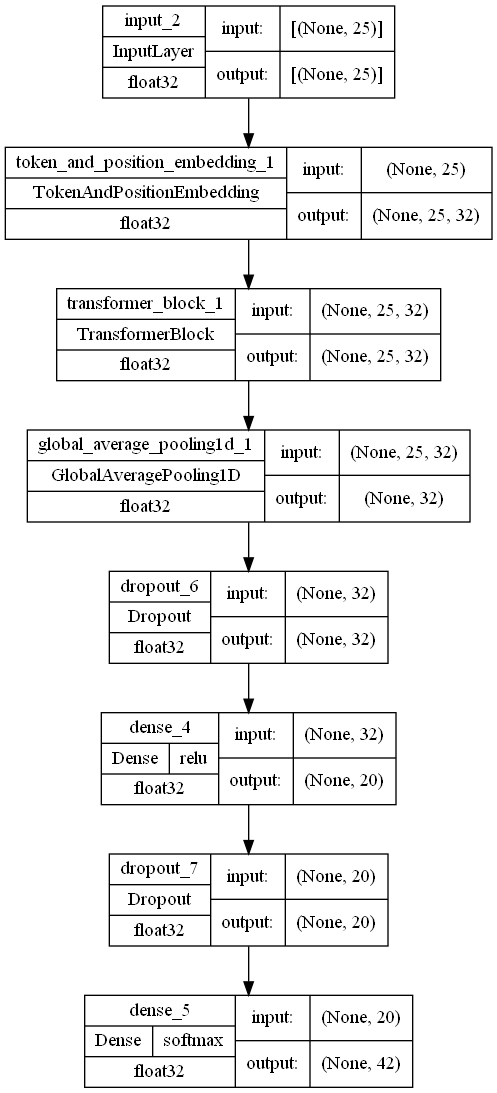

In [59]:
# Plot the model
tf.keras.utils.plot_model(model=model, show_dtype=True, show_shapes=True, show_layer_activations=True, show_layer_names=True)

In [60]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history=model.fit(x_data, y_train,
          batch_size=80,
          epochs=7,
          validation_split=0.25)

Epoch 1/7
1883/1883 [==============================] - 69s 36ms/step - loss: 2.3051 - accuracy: 0.4214 - val_loss: 1.9090 - val_accuracy: 0.5055
Epoch 2/7
1883/1883 [==============================] - 64s 34ms/step - loss: 1.6482 - accuracy: 0.5662 - val_loss: 1.7916 - val_accuracy: 0.5345
Epoch 3/7
1883/1883 [==============================] - 75s 40ms/step - loss: 1.3344 - accuracy: 0.6376 - val_loss: 1.8605 - val_accuracy: 0.5256
Epoch 4/7
1883/1883 [==============================] - 97s 52ms/step - loss: 1.1131 - accuracy: 0.6913 - val_loss: 2.0642 - val_accuracy: 0.5169
Epoch 5/7
1883/1883 [==============================] - 86s 46ms/step - loss: 0.9506 - accuracy: 0.7327 - val_loss: 2.2707 - val_accuracy: 0.5039
Epoch 6/7
1883/1883 [==============================] - 67s 36ms/step - loss: 0.8325 - accuracy: 0.7631 - val_loss: 2.5716 - val_accuracy: 0.4924
Epoch 7/7
1883/1883 [==============================] - 66s 35ms/step - loss: 0.7465 - accuracy: 0.7835 - val_loss: 2.7184 - val_ac

After 7 epochs, this model's Transformer architecture produced an accuracy of about 50 and a validation accuracy of around 51  
Maybe if we modify the architecture we will get better accuracy. However, the take away is that the Transformer architecture has a validation accuracy of 51% while the CNN after 7 epoch has around 48%. While not significantly better, the transformer does seem to produce a slight improvement.

Maybe it is the data that does not work well for CNN or Transformer in this case.

In [61]:
import matplotlib.pyplot as plt

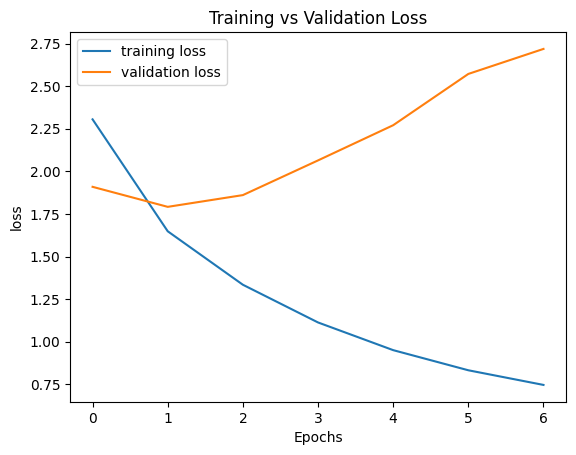

In [62]:
# Plot the losses
plt.title('Training vs Validation Loss')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

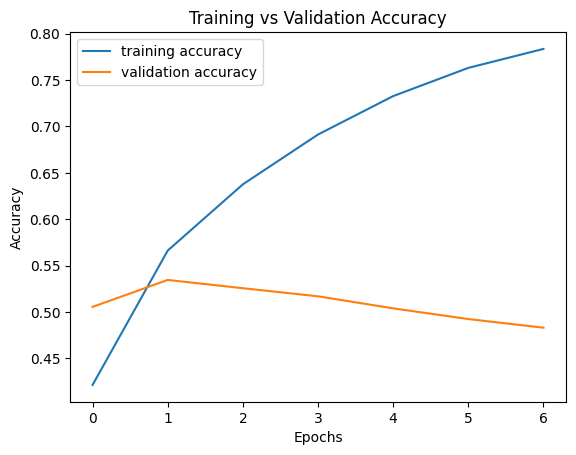

In [63]:
# Plot the accuracy
plt.title('Training vs Validation Accuracy')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Well that's it! We looked at how we can use the Transformer architecture to try to solve the this text classification problem. 

You can try to modify the architecture to see if you can get better accuracy.  

Hope you enjoyed this notebook as we got an introduction of the Transformer architecture.